In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

In [2]:
df=pd.read_csv(r"D:\Machine Learning\Projects\Real estate\Dataset\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
## Dropping Unwanted columns

df1=df.drop(["area_type","availability","society","balcony"],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


**Data Cleaning**

In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
## as null values are very less dropping null values
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df2['bhk']=df2['size'].apply(lambda row : int(row.split()[0]) )
df2=df2.drop(["size"],axis=1)
df2.head()

C:\Users\shiva\AppData\Local\Temp/ipykernel_12160/3346796118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda row : int(row.split()[0]) )


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.00,39.07,2
1,Chikka Tirupathi,2600,5.00,120.00,4
2,Uttarahalli,1440,2.00,62.00,3
3,Lingadheeranahalli,1521,3.00,95.00,3
4,Kothanur,1200,2.00,51.00,2


In [9]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
df2.query("bhk >20")

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.00,230.00,27
4684,Munnekollal,2400,40.00,660.00,43


In [11]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There is a range in total sqft , we convert range into mean value

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df2[~df2.total_sqft.apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.00,186.00,4
122,Hebbal,3067 - 8156,4.00,477.00,4
137,8th Phase JP Nagar,1042 - 1105,2.00,54.01,2
165,Sarjapur,1145 - 1340,2.00,43.49,2
188,KR Puram,1015 - 1540,2.00,56.80,2
410,Kengeri,34.46Sq. Meter,1.00,18.50,1
549,Hennur Road,1195 - 1440,2.00,63.77,2
648,Arekere,4125Perch,9.00,265.00,9
661,Yelahanka,1120 - 1145,2.00,48.13,2
672,Bettahalsoor,3090 - 5002,4.00,445.00,4


In [14]:
def mean_range(x):
    mean_list=x.split("-")
    if len(mean_list)==2:
        mean_value=(float(mean_list[0])+float(mean_list[1]))/2
        return mean_value
    try :
        return(float(x))
    except :
        return x  

In [15]:
df2.total_sqft=df2.total_sqft.apply(mean_range)

In [16]:
df2[~df2.total_sqft.apply(is_float)].total_sqft

410       34.46Sq. Meter
648            4125Perch
775        1000Sq. Meter
872        1100Sq. Yards
1019           5.31Acres
1086             30Acres
1400        716Sq. Meter
1712       1500Sq. Meter
1743     142.61Sq. Meter
1821       1574Sq. Yards
2310     361.33Sq. Yards
2881        117Sq. Yards
3228       3040Sq. Meter
3285        500Sq. Yards
4113        167Sq. Meter
4293        315Sq. Yards
5453              3Cents
5537     188.89Sq. Yards
5631        204Sq. Meter
5668         45Sq. Yards
5708      133.3Sq. Yards
5976      78.03Sq. Meter
6268        122Sq. Yards
6303      84.53Sq. Meter
6333           2.09Acres
6552            24Guntha
6592        697Sq. Meter
6953     142.61Sq. Meter
7001           1500Cents
7248        132Sq. Yards
7334              2Acres
7520       1100Sq. Meter
7607             15Acres
7726           1.26Acres
8273     151.11Sq. Yards
9423            1Grounds
9519       2940Sq. Yards
9734      45.06Sq. Meter
10488          1.25Acres
10491     86.72Sq. Meter


In [17]:
df2[~df2.total_sqft.apply(is_float)]
df3=pd.DataFrame()
df3[['number', 'text']] = df2[~df2.total_sqft.apply(is_float)].total_sqft.str.extract(r'([0-9,.]+)(\D+)')
df3.reset_index(drop=True,inplace=True)
df3.number=df3.number.astype("float")
df3.head()

,number,text
0,34.46,Sq. Meter
1,"4,125.00",Perch
2,"1,000.00",Sq. Meter
3,"1,100.00",Sq. Yards
4,5.31,Acres


In [18]:
df3.text.value_counts()

Sq. Meter    17
Sq. Yards    15
Acres         8
Cents         2
Guntha        2
Perch         1
Grounds       1
Name: text, dtype: int64

In [19]:
# Conversion factor dictionary
conversion_factors = {
    'Sq. Meter': 10.7639,  # 1 square meter = 10.7639 square feet
     'Perch':272.25,       # 1 Perch = 272.25 square feet
    'Acres': 43560,        # 1 acre = 43560 square feet
    'Sq. Yards': 9,        # 1 square yard = 9 square feet
    'Cents': 435.6,        # 1 cent = 435.6 square feet
    'Guntha': 1089,         # 1 guntha = 1089 square feet
    'Grounds':2400.35       # 1 guntha = 2400.35 square feet1 Square Feet
}

# Convert units to square feet
df3['area_sqft'] = df3.apply(lambda row: float(row['number'] * conversion_factors[row['text']]), axis=1)


# Display the result
df3

,number,text,area_sqft
0,34.46,Sq. Meter,370.92
1,"4,125.00",Perch,"1,123,031.25"
2,"1,000.00",Sq. Meter,"10,763.90"
3,"1,100.00",Sq. Yards,"9,900.00"
4,5.31,Acres,"231,303.60"
5,30.00,Acres,"1,306,800.00"
6,716.00,Sq. Meter,"7,706.95"
7,"1,500.00",Sq. Meter,"16,145.85"
8,142.61,Sq. Meter,"1,535.04"
9,"1,574.00",Sq. Yards,"14,166.00"


In [20]:
df2.loc[~df2.total_sqft.apply(is_float),"total_sqft"]=df3.area_sqft
df2['total_sqft'] = pd.to_numeric(df2['total_sqft'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


#### Data Cleaning in total_sqft column
In column total sqft has range values , we have converted range values to float by taking mean of float <br>
We have values with different units , we have converted diff area units to sqft

### Derived Metrics

Making a new column price per sqft <br>
price is in lakhs coverting price per sqft in normal value by multiplying with 100000

In [21]:
df2["price_per_sqft"]=df2["price"]*100000/df2["total_sqft"]
df2

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,"1,056.00",2.00,39.07,2,"3,699.81"
1,Chikka Tirupathi,"2,600.00",5.00,120.00,4,"4,615.38"
2,Uttarahalli,"1,440.00",2.00,62.00,3,"4,305.56"
3,Lingadheeranahalli,"1,521.00",3.00,95.00,3,"6,245.89"
4,Kothanur,"1,200.00",2.00,51.00,2,"4,250.00"
...,...,...,...,...,...,...
13315,Whitefield,"3,453.00",4.00,231.00,5,"6,689.83"
13316,Richards Town,"3,600.00",5.00,400.00,4,"11,111.11"
13317,Raja Rajeshwari Nagar,"1,141.00",2.00,60.00,2,"5,258.55"
13318,Padmanabhanagar,"4,689.00",4.00,488.00,4,"10,407.34"


In [22]:
## Location column
df2.location.value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [23]:
location_stats=df2.groupby("location").location.agg("count").sort_values(ascending=False)
location_less_than_10=location_stats[location_stats<=10]

There are 1265 unique values in location column , Renamed value with others if count is <=10

In [24]:
# Rename location to others if count is <=10

df2.location=df2.location.apply(lambda row : "other" if row in location_less_than_10 else row)
df2.location.value_counts()

other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [25]:
#Remove data if sqft per bedroom is less than 300 (As per domain expert)
df2=df2[~(df2.total_sqft/df2.bhk<300)]
df2

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,"1,056.00",2.00,39.07,2,"3,699.81"
1,Chikka Tirupathi,"2,600.00",5.00,120.00,4,"4,615.38"
2,Uttarahalli,"1,440.00",2.00,62.00,3,"4,305.56"
3,Lingadheeranahalli,"1,521.00",3.00,95.00,3,"6,245.89"
4,Kothanur,"1,200.00",2.00,51.00,2,"4,250.00"
...,...,...,...,...,...,...
13315,Whitefield,"3,453.00",4.00,231.00,5,"6,689.83"
13316,other,"3,600.00",5.00,400.00,4,"11,111.11"
13317,Raja Rajeshwari Nagar,"1,141.00",2.00,60.00,2,"5,258.55"
13318,Padmanabhanagar,"4,689.00",4.00,488.00,4,"10,407.34"


In [30]:
 def remove_outliers(df):   
    dfout=pd.DataFrame()
    for key,subdf in df.groupby("location"):        
        # Calculate mean and standard deviation
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        # Define lower bond & updder bond
        lower_bond=m-sd
        upper_bond=m+sd
        reduced_df=subdf[(subdf.price_per_sqft>lower_bond) & (subdf.price_per_sqft<=upper_bond)]
        dfout=pd.concat([dfout,reduced_df],ignore_index=True)
    return dfout


In [31]:
df5=remove_outliers(df2)
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,"1,250.00",2.00,44.00,3,"3,520.00"
1,Devarachikkanahalli,"1,250.00",2.00,40.00,2,"3,200.00"
2,Devarachikkanahalli,"1,200.00",2.00,83.00,2,"6,916.67"
3,Devarachikkanahalli,"1,170.00",2.00,40.00,2,"3,418.80"
4,Devarachikkanahalli,"1,425.00",2.00,65.00,3,"4,561.40"
...,...,...,...,...,...,...
10239,other,"1,353.00",2.00,110.00,2,"8,130.08"
10240,other,812.00,1.00,26.00,1,"3,201.97"
10241,other,"1,440.00",2.00,63.93,3,"4,439.58"
10242,other,"1,075.00",2.00,48.00,2,"4,465.12"


#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [58]:
def plot_scatter(df,area):
    bhk2=df[(df.location==area) & (df.bhk==2)]
    bhk3=df[(df.location==area) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(area)
    plt.legend()


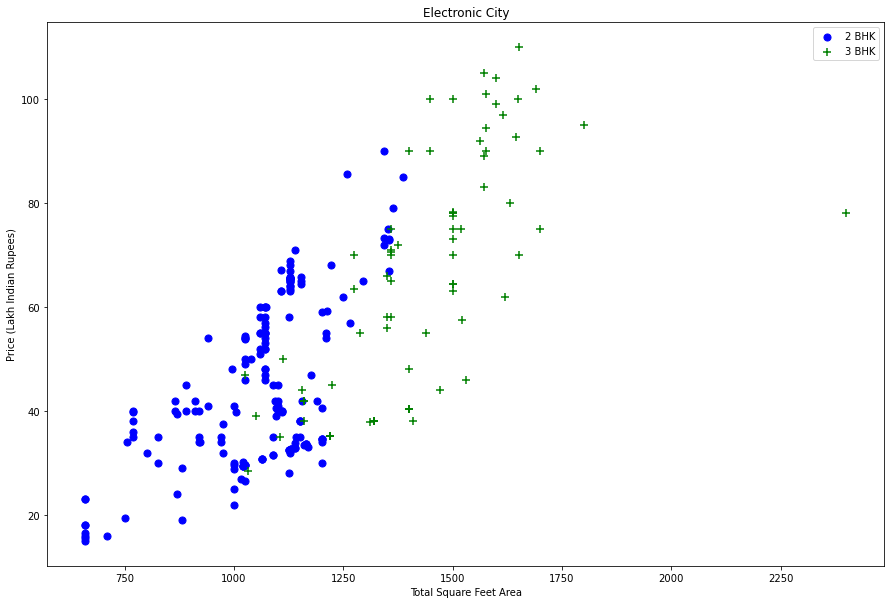

In [60]:
plot_scatter(df5,"Electronic City")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{   <br>
        '1' : {<br>
        'mean': 4000,<br>
        'std: 2000,<br>
        'count': 34<br>
    },   <br>
        '2' : {<br>
        'mean': 4300,<br>
        'std: 2300,<br>
        'count': 22<br>
    },<br>
}<br>
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7342, 6)

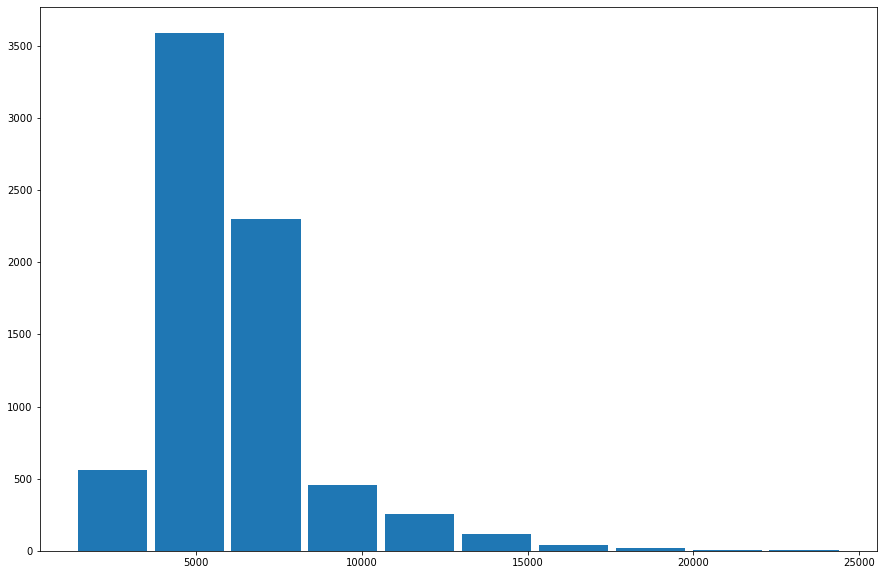

In [67]:
plt.hist(df6.price_per_sqft,rwidth=0.9)
plt.show()

In [62]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

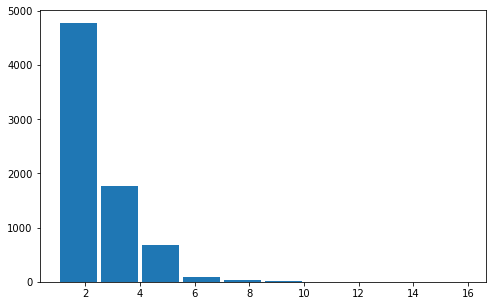

In [77]:
plt.figure(figsize=(8,5))
plt.hist(df6.bath,rwidth=0.9)
plt.show()

In [80]:
df6=df6[~(df6.bath>df6.bhk+2)]
df6

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,"1,250.00",2.00,40.00,2,"3,200.00"
2,Devarachikkanahalli,"1,200.00",2.00,83.00,2,"6,916.67"
3,Devarachikkanahalli,"1,170.00",2.00,40.00,2,"3,418.80"
4,Devarachikkanahalli,"1,425.00",2.00,65.00,3,"4,561.40"
5,Devarachikkanahalli,947.00,2.00,43.00,2,"4,540.65"
...,...,...,...,...,...,...
10235,other,"1,200.00",2.00,70.00,2,"5,833.33"
10236,other,"1,800.00",1.00,200.00,1,"11,111.11"
10239,other,"1,353.00",2.00,110.00,2,"8,130.08"
10240,other,812.00,1.00,26.00,1,"3,201.97"


In [82]:
dfclean=df6.drop(["price_per_sqft"],axis=1)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,"1,250.00",2.00,40.00,2
2,Devarachikkanahalli,"1,200.00",2.00,83.00,2
3,Devarachikkanahalli,"1,170.00",2.00,40.00,2
4,Devarachikkanahalli,"1,425.00",2.00,65.00,3
5,Devarachikkanahalli,947.00,2.00,43.00,2
...,...,...,...,...,...
10235,other,"1,200.00",2.00,70.00,2
10236,other,"1,800.00",1.00,200.00,1
10239,other,"1,353.00",2.00,110.00,2
10240,other,812.00,1.00,26.00,1


In [83]:
dfclean.to_csv('Clean_Data.csv')